In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# classification
from sklearn.svm import SVC
from sklearn.metrics  import (f1_score ,accuracy_score, confusion_matrix,
                            classification_report, ConfusionMatrixDisplay)
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [5]:
# sns.set_theme(style="ggplot")

In [3]:
df_path = '../datasets/stroke_data.csv'
df = pd.read_csv(df_path, index_col=0)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
cols = df.columns
cols

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [9]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [10]:
df.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [11]:
df[['ever_married']] = df[['ever_married']].replace({'Yes': True, 'No': False})

C:\Users\User\AppData\Local\Temp\ipykernel_4840\701064685.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['ever_married']] = df[['ever_married']].replace({'Yes': True, 'No': False})


In [13]:
df[['ever_married']] = df[['ever_married']].astype('int')

In [16]:
len(cols)

11

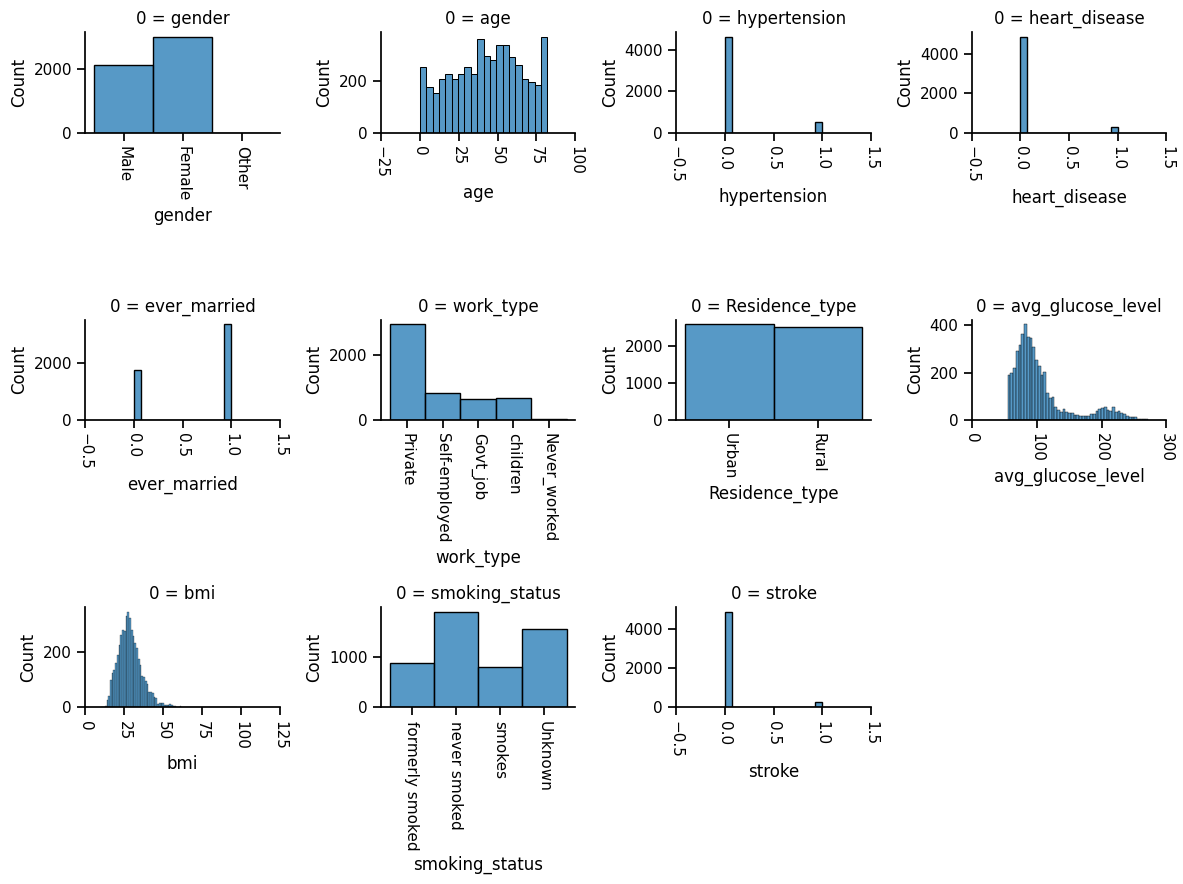

In [37]:
g = sns.FacetGrid(pd.DataFrame(list(cols)), col=0, col_wrap=4, sharex=False, sharey=False)
for ax, col in zip(g.axes, list(cols)):
    sns.histplot(df[col], ax=ax)
g.set_xticklabels(rotation=-90)
g.tight_layout()

In [40]:
# Define the number of rows and columns you want
# n_rows=3
# n_cols=4
# # Create the subplots
# fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
# for i, column in enumerate(df.columns):
#     sns.histplot(df[column],ax=axes[i//n_cols,i%n_cols])
# fig.tight_layout()

It seem, perhaps expectedly, the data is heavily skewed towards patient with no heart diesease, no hypertension and without having suffered a stroke. Also, about twice of the pasrticipants were ever married, and most work for a private company.

Let's look at some relations between potentially obvious factors and the target

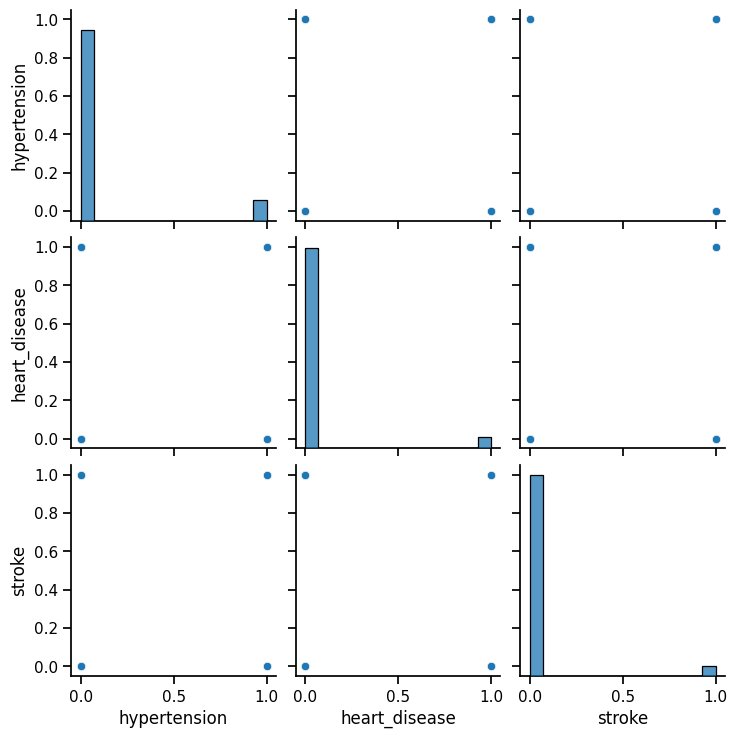

In [39]:
sns.pairplot(df[['hypertension', 'heart_disease', 'stroke', 'smoking_status']])

In [45]:
# df[df['stroke']==1].count()
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [53]:
with_stroke = df[df['stroke']==1]
stroke_hypertension = with_stroke[['hypertension']].value_counts()
stroke_hypertension[1] * 100 / stroke_hypertension[0]

36.0655737704918

In [52]:
hypertension = df[['hypertension']].value_counts()
hypertension[1] * 100 / hypertension[0]

10.797918473547268

In [58]:
stroke_heart = with_stroke[['heart_disease']].value_counts()
stroke_heart_disease_chance = stroke_heart[1] * 100 / stroke_heart[0]
stroke_heart_disease_chance

23.26732673267327

In [59]:
heart = df[['heart_disease']].value_counts()
heart_disease_chance = heart[1] * 100 / heart[0]
heart_disease_chance

5.709557302441042

In [60]:
stroke_heart_disease_chance / heart_disease_chance

4.0751542545558905

4 times higher chance

In [61]:
stroke_smoking = with_stroke[['smoking_status']].value_counts()

In [65]:
pd.DataFrame(stroke_smoking)

,count
smoking_status,
never smoked,90
formerly smoked,70
Unknown,47
smokes,42


Text(0.5, 1.0, 'smoking_status')

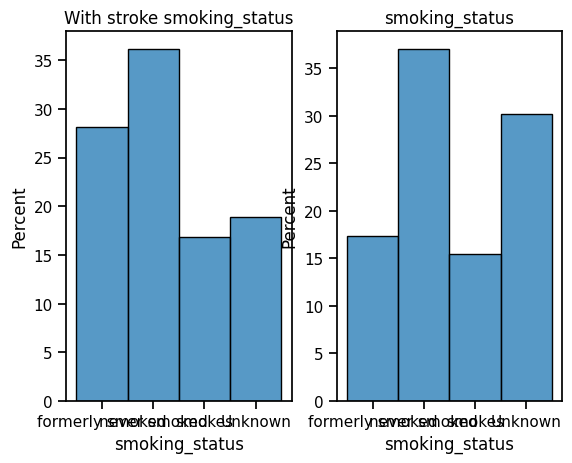

In [76]:
fig, (ax1, ax2) = plt.subplots(1,2)

# fig = sns.barplot(pd.DataFrame(stroke_smoking), x='smoking_status', y='count')
sns.histplot(with_stroke, x='smoking_status', stat='percent', ax=ax1)
ax1.set_title("With stroke smoking_status")

sns.histplot(df, x='smoking_status', stat='percent', ax=ax2)
ax2.set_title("smoking_status")

In [ ]:
smoking_df = 